In [1]:
import pandas as pd
import os
from scipy.interpolate import PchipInterpolator
import numpy as np
from scipy.stats import spearmanr
from tqdm import tqdm
import matplotlib.pyplot as plt

In [13]:
#dataframe datos de compositores 

datos_composers = {}
carpeta = r'Sequences\labels'
archivos_en_carpeta = os.listdir(carpeta)
print(archivos_en_carpeta)
index0 = 0
indice = 0

for archivo in archivos_en_carpeta:
    ruta_completa = os.path.join(carpeta, archivo)
    serie = pd.read_csv(ruta_completa, header = None)
    composer = archivo.split('-')[1].capitalize() # nombre compositor
    datos_composers[composer] = {} #genero bibio para composer
    datos_composers[composer]['Birth_year'] = archivo.split('-')[0] #año de nacimiento
    index1 = serie.iloc[0, 0].split('\t')[0] #el # del primer serie del composer
    index2 = int(serie.iloc[len(serie)-3, 0].split('\t')[0]) - index0 # # Piezas
    index0 = index2 + index0 # numero total de piezas anteriores
    datos_composers[composer]['# Piezas'] = index2 # Piezas
    datos_composers[composer]['Indice'] = indice
    indice += 1

datos_composers_df = pd.DataFrame(datos_composers)
print('Total Pieces = ',datos_composers_df.sum(axis=1)[1])
print(datos_composers_df)    

['1397-dufay-Labels.txt', '1500-morales-Labels.txt', '1521-desprez-Labels.txt', '1525-palestrina-Labels.txt', '1532-lasso-Labels.txt', '1538-byrd-Labels.txt', '1548-victoria-Labels.txt', '1557-gabrielis-Labels.txt', '1563-dowland-Labels.txt', '1566-gesualdo-Labels.txt', '1567-monteverdi-Labels.txt', '1583-frescobaldi-Labels.txt', '1587-scheidt-Labels.txt', '1616-froberger-Labels.txt', '1629-anglebert-Labels.txt', '1632-lully-Labels.txt', '1637-buxtehude-Labels.txt', '1653-pachelbel-Labels.txt', '1668-couperin-Labels.txt', '1671-albinoni-Labels.txt', '1678-vivaldi-Labels.txt', '1681-telemann-Labels.txt', '1682-dandrieu-Labels.txt', '1683-rameau-Labels.txt', '1685-handel-Labels.txt', '1685-scarlatti-Labels.txt', '1688-zipoli-Labels.txt', '1721-bach-js-Labels.txt', '1732-haydn-Labels.txt', '1736-albrechtsberger-Labels.txt', '1752-clementi-Labels.txt', '1756-mozart-Labels.txt', '1770-beethoven-Labels.txt', '1771-cramer-Labels.txt', '1782-paganini-Labels.txt', '1797-schubert-Labels.txt', '1

C:\Users\PC BULLOCK\AppData\Local\Temp\ipykernel_9376\1761750877.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('Total Pieces = ',datos_composers_df.sum(axis=1)[1])


In [14]:
composers = {}
M = 0
carpeta = r'Sequences\Series'
archivos_en_carpeta = os.listdir(carpeta)

for archivo in archivos_en_carpeta:
    ruta_completa = os.path.join(carpeta, archivo)
    serie = pd.read_csv(ruta_completa)
    # escoge una serie
    composer = archivo.split('-')[1].capitalize() # nombre compositor
    composers[composer] = {}

    for pieza in range( datos_composers[composer]['# Piezas'] ):
        N = serie.iloc[0, 0].split('\t')[1] # # de elementos por pieza
        M = int(N) + M
        index_n1 = 0 
        index_n2 = int(N)+2 
        serie_n = serie[index_n1 + 2:index_n2].reset_index(drop=True) # resetear index
        serie = serie[index_n2 +1:] # recortar serie Original
        serie_n.index += 1 # que index empiece desde 1
        num_serie_T = serie.columns[0]  # numero de serie de todo el dataset
        num_serie = pieza + 1
        composers[composer]['Serie_'+str(num_serie)] = serie_n.squeeze().to_numpy().astype(float) # agregamos pieza al dicc composer con key como # serie
print('Número total de elementos de todo el dataset: ', M)

Número total de elementos de todo el dataset:  8250485


In [ ]:
import copy
def midi_to_hz(midi_notes):
    # Fórmula para convertir número MIDI a Hz
    freqs = 440.0 * 2 ** ((midi_notes - 69) / 12.0)
    return freqs

# composers_interp = copy.deepcopy(composers)
composers_Hz = copy.deepcopy(composers)

for composer in composers_Hz.keys():
    for pieza in composers_Hz[composer].keys():
        subject = composers[composer][pieza]
        composers_Hz[composer][pieza] = midi_to_hz(subject)

In [18]:
composers_Hz_depurado = copy.deepcopy(composers_Hz)
datos_composers_Hz_depurado = copy.deepcopy(datos_composers)

for composer in composers_Hz.keys():
    d = 0
    for pieza in composers_Hz[composer].keys():
        if len(composers_Hz[composer][pieza])//2 < 400:
            del composers_Hz_depurado[composer][pieza]
            d = d + 1
    datos_composers_Hz_depurado[composer]['# Piezas'] = datos_composers[composer]['# Piezas'] - d
    print(f"Piezas eliminadas de {composer} = {d}, de {datos_composers[composer]['# Piezas']} Piezas ({datos_composers[composer]['# Piezas'] - d} Total)")            


Piezas eliminadas de Dufay = 13, de 13 Piezas (0 Total)
Piezas eliminadas de Morales = 87, de 88 Piezas (1 Total)
Piezas eliminadas de Desprez = 35, de 35 Piezas (0 Total)
Piezas eliminadas de Palestrina = 61, de 61 Piezas (0 Total)
Piezas eliminadas de Lasso = 70, de 70 Piezas (0 Total)
Piezas eliminadas de Byrd = 56, de 109 Piezas (53 Total)
Piezas eliminadas de Victoria = 326, de 326 Piezas (0 Total)
Piezas eliminadas de Gabrielis = 23, de 23 Piezas (0 Total)
Piezas eliminadas de Dowland = 61, de 61 Piezas (0 Total)
Piezas eliminadas de Gesualdo = 37, de 37 Piezas (0 Total)
Piezas eliminadas de Monteverdi = 20, de 20 Piezas (0 Total)
Piezas eliminadas de Frescobaldi = 93, de 104 Piezas (11 Total)
Piezas eliminadas de Scheidt = 8, de 8 Piezas (0 Total)
Piezas eliminadas de Froberger = 49, de 60 Piezas (11 Total)
Piezas eliminadas de Anglebert = 54, de 67 Piezas (13 Total)
Piezas eliminadas de Lully = 102, de 103 Piezas (1 Total)
Piezas eliminadas de Buxtehude = 48, de 94 Piezas (46 T

In [22]:
# 40 promedio de numero de piezas por compositor
composers_Hz_depurado_v2 = copy.deepcopy(composers_Hz_depurado)
datos_composers_Hz_depurado_v2 = copy.deepcopy(datos_composers_Hz_depurado)

for composer in composers.keys():
    if datos_composers_Hz_depurado[composer]['# Piezas'] < 40:
        del composers_Hz_depurado_v2[composer]
        del datos_composers_Hz_depurado_v2[composer]
print(" # de compositores restantes: ", len(composers_Hz_depurado_v2))

 # de compositores restantes:  17


In [29]:
"""Ahora nos quedamos con número de piezas iguales para todos los 17 compositores"""

fa = np.array([datos_composers_Hz_depurado_v2[composer]['# Piezas'] for composer in composers_Hz_depurado_v2.keys()])


# Calculos

In [43]:
fa = np.array([datos_composers_Hz_depurado_v2[composer]['# Piezas'] for composer in composers_Hz_depurado_v2.keys()])
print(np.max(fa) + 1)
len(composers_Hz_depurado_v2)

518


17

In [45]:
# Ns = np.full((17,518), np.nan)
# for x, composer in enumerate(composers_Hz_depurado_v2):
#     for y, serie in enumerate(composers_Hz_depurado_v2[composer]):
#         Ns[x,y] = len(composers_Hz_depurado_v2[composer][serie])
# np.save('Ns_depurado.npy', Ns)

"""Se guardó la el tamaño de cada serie en Ns_depurado.npy"""

'Se guardó la el tamaño de cada serie en Ns_depurado.npy'

In [30]:
import numpy as np
import matplotlib.pyplot as plt

def arm_detector(y,window_size):
    window_size = window_size
    threshold_high = 2.3
    threshold_low = -2.3

    transition_point = None

    # Desplazar la ventana a lo largo del array
    for i in range(len(y) - window_size):
        window = y[i:i + window_size]
        
        # Verificar si hay valores por arriba de 2.5 o por abajo de -2.5
        if not np.any(window >= threshold_high) and not np.any(window <= threshold_low):
            transition_point = i
            break
        else:
            continue 

    return transition_point

def J_univariante(X,tau, corte):
    def distancia(p1, p2):
        return np.linalg.norm(np.array(p2)-np.array(p1))
    x1 = X[tau:]
    y1 = X[:-tau]
    ff1 = np.angle(np.fft.rfft(x1))
    ff2 = np.angle(np.fft.rfft(y1))
    if corte:
        transition_point1 = arm_detector(ff1, 500)
        transition_point2 = arm_detector(ff2, 500)
        if transition_point2 is not None:
            ff2 = ff2[:transition_point2]
        elif transition_point2 is None:
            transition_point2 = len(ff2)
        if transition_point1 is not None and transition_point1 < transition_point2:
            ff1 = ff1[:transition_point1]
        else:
            ff1 = ff1[:transition_point2]

    vectores = []
    for i in range(len(ff1)-1):
        p1 = [ff1[i], ff2[i]]
        p2 = [ff1[i+1], ff2[i+1]]
        cuadrante = [[p2[0]-p1[0], p2[1]-p1[1]], [p2[0]-p1[0], p2[1]+2*np.pi-p1[1]],
            [p2[0]+2*np.pi-p1[0],p2[1]+2*np.pi-p1[1]],[p2[0]+2*np.pi-p1[0],p2[1]-p1[1]],
            [p2[0]+2*np.pi-p1[0],p2[1]-2*np.pi-p1[1]],[p2[0]-p1[0],p2[1]-2*np.pi-p1[1]],
            [p2[0]-2*np.pi-p1[0],p2[1]-2*np.pi-p1[1]],[p2[0]-2*np.pi-p1[0],p2[1]-p1[1]],
            [p2[0]-2*np.pi-p1[0],p2[1]+2*np.pi-p1[1]]]
        distancia1 = [distancia(p1,c) for c in cuadrante]
        p2 = cuadrante[np.argmin(distancia1)]
        vectores.append([p2[0]-p1[0],p2[1]-p1[1]])
    angulos = []
    for i in range(len(vectores)-1):
        v1=vectores[i]
        v2=vectores[i+1]
        v1_norm=v1/np.linalg.norm(v1)
        v2_norm=v2/np.linalg.norm(v2)
        angulo=np.arccos(np.clip(np.dot(v1_norm,v2_norm),-1.0,1.0))
        cruz=v1[0]*v2[1]-v1[1]*v2[0]
        if cruz>0:
            angulo=np.pi-angulo
        if cruz==0 and angulo==0:
            angulo=angulo
        if cruz==0 and angulo<0:
            angulo=np.pi
        if cruz<0:
            angulo=angulo+np.pi
        angulos.append(angulo)
    e=[]
    for k in range(len(angulos)):
        e.append(np.exp(angulos[k]*1j))
    e1=np.sum(e)/len(angulos)
    J=1.-np.abs(e1.real)
    return J

def interpolador(subject, method, size):
    # data = np.array([int(line.strip()) for line in subject.to_numpy()])
    data = subject
    x = np.arange(len(data))
    x_new = np.linspace(0, len(data) - 1, size)
    x_new = np.unique(np.concatenate((x, x_new)))  
    if method == 'lineal':
        data_interp = np.interp(x_new, x, data)
    if method == 'herm':
        interpolator = PchipInterpolator(x, data)
        data_interp = interpolator(x_new)
    return data_interp

In [32]:
"""Compute everything"""

# import matplotlib.pyplot as plt
# import pickle
# import numpy as np
# import matplotlib.pyplot as plt
# from scipy.interpolate import PchipInterpolator


# #################
# for composer in composers_Hz_depurado_v2:


#     J_interp_hermite = []

#     for subject in composers_Hz_depurado_v2[composer].values():


#         interp_herm = interpolador(subject, 'herm', 10000)

#         J_herm = J_univariante(interp_herm, len(interp_herm)//2, True)

#         J_interp_hermite.append(J_herm)

#     np.save('J_hermite_cortado_depurado/'+ str(datos_composers[composer]['Birth_year']) + '_J_interp_' + str(composer) + '_herm.npy', np.array(J_interp_hermite))
#     print(composer)

Byrd
Buxtehude
Handel
Scarlatti
Bach
Haydn
Mozart
Beethoven
Schubert
Chopin
Schumann
Liszt
Alkan
Brahms
Tchaikovsky
Dvorak
Debussy


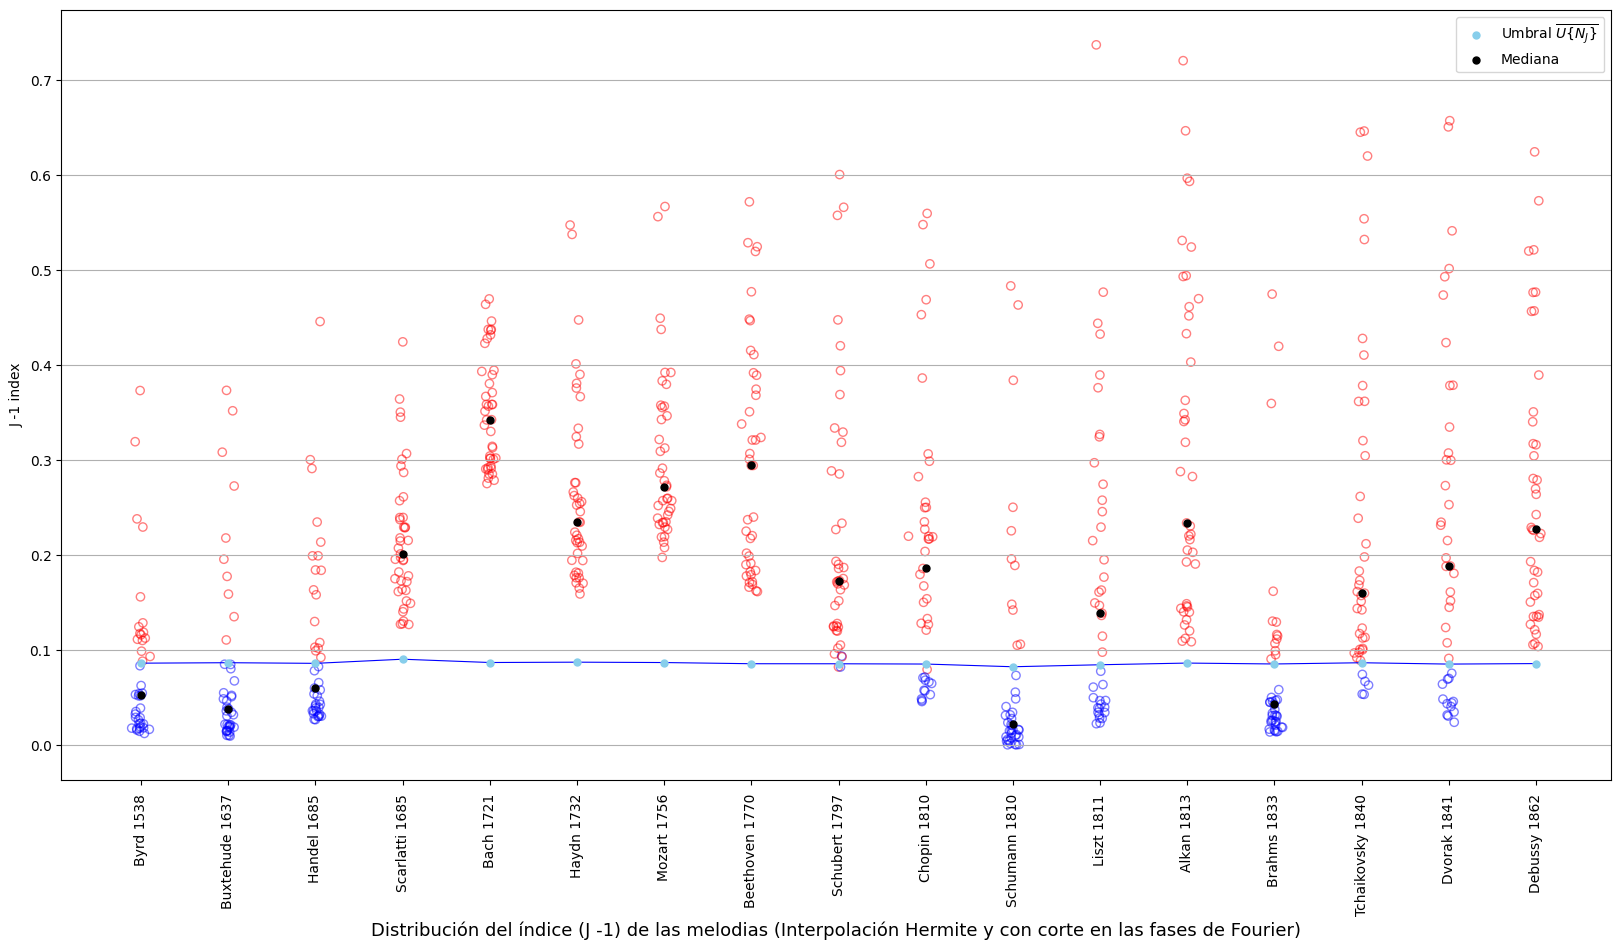

In [68]:
import numpy as np
import matplotlib.pyplot as plt
import os

Ns = np.load('Ns_depurado.npy')//2
J_minus_2000 = np.load('J_minus_2000.npy')

carpeta2 = 'J_hermite_cortado_depurado' 

archivos_en_carpeta2 = os.listdir(carpeta2)

data2 = [1 - np.sort(np.load(os.path.join(carpeta2, array)))[:41] for array in archivos_en_carpeta2]
Ns_data = [Ns[array] for array in range(np.shape(Ns)[0])]

data2 = [array[~np.isnan(array)] for array in data2]
Ns_data = [array[~np.isnan(array)] for array in Ns_data]


for j in range(17):
    for i in range(len(Ns_data[j])):
        if Ns_data[j][i] >= 2000:
            Ns_data[j][i] = 1999

umbral = [[J_minus_2000[int(i) - 20] for i in Ns_data[j]] for j in range(17)]

# Aquí, asume que `puntos` es la lista con los 17 elementos
puntos1 = [J_minus_2000[int(np.mean(Ns_data[j])) - 20] for j in range(17)]
puntos2 = [np.mean(np.array([1 - J_minus_2000[int(i) - 20] for i in Ns_data[j]])) for j in range(17)]
mediana = [np.median(array) for array in data2]

fig, ax = plt.subplots(figsize=(20, 10))
# box2 = ax.boxplot(data2, patch_artist=True)

for i, (d, u) in enumerate(zip(data2, umbral)):
    # Añadir dispersión para evitar superposición
    x = np.random.normal(i + 1, 0.04, size=len(d))
    colors = ['blue' if d_val < u_val else 'red' for d_val, u_val in zip(d, [1-x for x in u])]
    plt.scatter(x, d, alpha=0.5, color='none', edgecolors=colors)

ax.set_xlabel(f'Distribución del índice (J -1) de las melodias (Interpolación Hermite y con corte en las fases de Fourier)', fontsize=13)
ax.set_ylabel('J -1 index')
ax.set_xticks(np.arange(1, 18))

# ax.scatter(np.arange(1, 78), puntos1, color='red', s=50, zorder=3, marker = '*', label=r'$U\{\overline{N_J}\}$')
ax.scatter(np.arange(1, 18), puntos2, color='#87CEEB', s=25, zorder=3, marker = 'o', label=r'Umbral $\overline{U\{ N_J \}}$')
ax.scatter(np.arange(1, 18), mediana, color='black',s=25,zorder=3,marker='o',label='Mediana')
ax.plot(np.arange(1, 18), puntos2, color='blue', linestyle='-', linewidth=0.8)
# ax.plot(np.arange(1, 18), mediana, color='red', linestyle='-', linewidth=0.8)

ax.legend()
ax.set_xticklabels([f"{composer} {datos_composers_Hz_depurado_v2[composer]['Birth_year']} " for i, composer in enumerate(datos_composers_Hz_depurado_v2.keys())], rotation=90)


plt.grid(axis='y')
plt.show()

In [66]:
import numpy as np

array = np.array([3, 1, 4, 1, 5, 9, 4, 5, 10, 8, 2])
array_ordenado = np.sort(array)[:]
print(array_ordenado)


[10  9  8  5  5  4  4  3  2  1  1]
